In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

In [2]:
import urllib.request

url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
urllib.request.urlretrieve(url, 'data-hmw-week-3.csv')

('data-hmw-week-3.csv', <http.client.HTTPMessage at 0x29b7f8d3550>)

In [3]:
df = pd.read_csv('data-hmw-week-3.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
columns = ['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg',
'MSRP']

In [5]:
df = df[columns]
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [6]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Vehicle Style         object
highway MPG            int64
city mpg               int64
MSRP                   int64
dtype: object

In [7]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [8]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [9]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [10]:
df['engine_hp'] = df['engine_hp'].fillna(0)
df['engine_cylinders'] = df['engine_cylinders'].fillna(0)

df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [11]:
df = df.rename(columns={'msrp': 'price'})

df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


--------------------

# Question 1 

What is the most frequent observation (mode) for the column transmission_type?

- AUTOMATIC
- MANUAL
- AUTOMATED_MANUAL
- DIRECT_DRIVE

In [12]:
df['transmission_type'].value_counts()

transmission_type
automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: count, dtype: int64

--------------------------------

# Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- engine_hp and year
- engine_hp and engine_cylinders
- highway_mpg and engine_cylinders
- highway_mpg and city_mpg

c:\Users\Harold Uribe Romero\Documents\GitHub\ml-zoomcamp-activities\venv\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


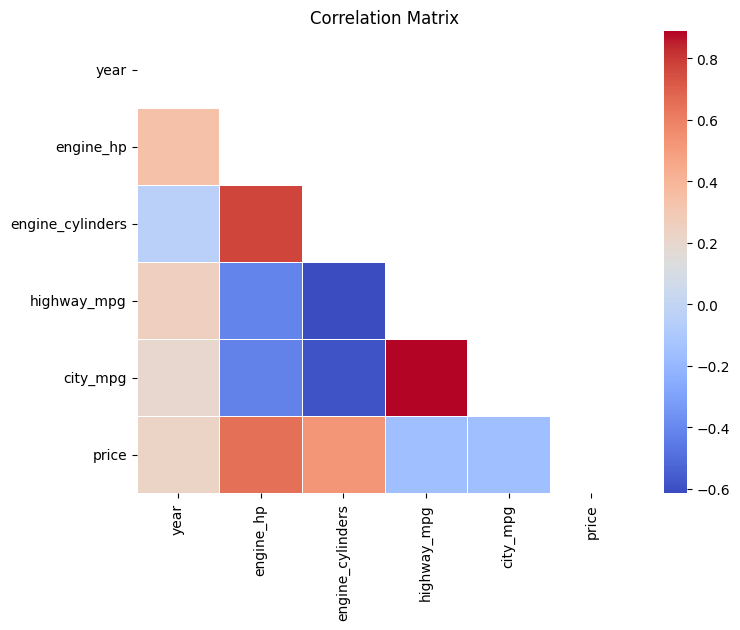

In [13]:
# Extract numeric columns from the dataset
numeric = df.columns[df.dtypes != 'object']

# Compute the correlation matrix
correlation_matrix = df[numeric].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#Create a figure to display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,mask=mask)
plt.title('Correlation Matrix')
plt.show()

--------------------------

In [14]:
price_avg = df['price'].mean()
price_avg

40594.737032063116

In [15]:
df['above_average'] = (df['price'] > price_avg).astype(int)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0


In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

-----------------

# Question 3
Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).

Which of these variables has the lowest mutual information score?

- make
- model
- transmission_type
- vehicle_style

In [18]:
categorical_columns = ['make', 'model', 'transmission_type', 'vehicle_style']
categorical_columns

['make', 'model', 'transmission_type', 'vehicle_style']

In [19]:
def mutual_info_price_score(series):
    return mutual_info_score(series, y_train)

In [20]:
mutual_info_price_score = df_train[categorical_columns].apply(mutual_info_price_score).round(2)
mutual_info_price_score.sort_values(ascending=False)

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

--------------------
# Question 4
Now let's train a logistic regression.
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.

Fit the model on the training dataset.

To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:

model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95

In [21]:
numerical_columns = ['year', 'highway_mpg', 'city_mpg', 'price']

df_train[categorical_columns + numerical_columns]

,make,model,transmission_type,vehicle_style,year,highway_mpg,city_mpg,price
0,mitsubishi,endeavor,automatic,4dr_suv,2011,19,15,33599
1,kia,borrego,automatic,4dr_suv,2009,21,17,26245
2,lamborghini,gallardo,manual,convertible,2012,20,12,248000
3,chevrolet,colorado,automatic,crew_cab_pickup,2016,27,20,24990
4,pontiac,vibe,automatic,4dr_hatchback,2009,26,20,20475
...,...,...,...,...,...,...,...,...
7143,toyota,sienna,automatic,passenger_minivan,2016,25,18,37655
7144,chevrolet,hhr,manual,wagon,2009,29,21,25135
7145,hyundai,veracruz,automatic,4dr_suv,2012,22,17,28345
7146,mitsubishi,expo,manual,2dr_hatchback,1993,26,19,2000


In [25]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
dv.fit(train_dict)

X_train = dv.transform(train_dict)

model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy_1 = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy_1)

1.0


In [23]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred
decision = (y_pred >= 0.5)
(y_val == decision).mean()

1.0

-------------------------

# Question 5
Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).

Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- year
- engine_hp
- transmission_type
- city_mpg

Note: the difference doesn't have to be positive

In [90]:

columns_df = df_train.columns
accuracy_list = []

for col in columns_df:
    df_train_1 = df_train.drop(col, axis=1)
    df_val_1 = df_val.drop(col, axis=1)

    categorical_columns = list(df_train_1.dtypes[df_train_1.dtypes == 'object'].index)
    numerical_columns = list(df_train_1.dtypes[df_train_1.dtypes != 'object'].index)

    dv = DictVectorizer(sparse=False)
    train_dict = df_train_1[categorical_columns + numerical_columns].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val_1[categorical_columns + numerical_columns].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    accuracy = np.round(accuracy_score(y_val, y_pred),2)
    accuracy_list.append(accuracy)

    print(col, (accuracy_1 - accuracy).round(2), accuracy)

make 0.0 1.0
model 0.0 1.0
year 0.05 0.95
engine_hp 0.0 1.0
engine_cylinders 0.0 1.0
transmission_type 0.0 1.0
vehicle_style 0.0 1.0
highway_mpg 0.0 1.0
city_mpg 0.0 1.0
price 0.07 0.93


In [91]:
categorical_columns = list(df_train.dtypes[df_train.dtypes == 'object'].index)
numerical_columns = list(df_train.dtypes[df_train.dtypes != 'object'].index)

df[categorical_columns+numerical_columns].head()

,make,model,transmission_type,vehicle_style,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
0,bmw,1_series_m,manual,coupe,2011,335.0,6.0,26,19,46135
1,bmw,1_series,manual,convertible,2011,300.0,6.0,28,19,40650
2,bmw,1_series,manual,coupe,2011,300.0,6.0,28,20,36350
3,bmw,1_series,manual,coupe,2011,230.0,6.0,28,18,29450
4,bmw,1_series,manual,convertible,2011,230.0,6.0,28,18,34500


-----------------

# Question 6
For this question, we'll see how to use a linear regression model from Scikit-Learn.

We'll need to use the original column price. Apply the logarithmic transformation to this column.

Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.

This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].

Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

Note: If there are multiple options, select the smallest alpha.

In [92]:
df2 = df.copy()
df2.drop(['above_average'], axis=1, inplace=True)

In [93]:
# Aplicar el logaritmo natural a la columna 'precio' y eliminar la columna original
df2['price'] = df2['price'].apply(lambda x: np.log1p(x))

# Renombrar la columna transformada
df2 = df2.rename(columns={'price': 'price_log'})

df2.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price_log
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,10.739349
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,10.612779
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,10.500977
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,10.290483
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,10.448744


In [94]:
df_train_full, df_test = train_test_split(df2, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [95]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [96]:
y_train = df_train.price_log.values
y_val = df_val.price_log.values
y_test = df_test.price_log.values

del df_train['price_log']
del df_val['price_log']
del df_test['price_log']

In [98]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
dtype: object

In [99]:
categorical_columns = ['make', 'model', 'transmission_type', 'vehicle_style']
numerical_columns = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [100]:
train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [103]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver='sag',random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(a, np.round(rmse,3))
    

c:\Users\Harold Uribe Romero\Documents\GitHub\ml-zoomcamp-activities\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.487


c:\Users\Harold Uribe Romero\Documents\GitHub\ml-zoomcamp-activities\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.487


c:\Users\Harold Uribe Romero\Documents\GitHub\ml-zoomcamp-activities\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.487


c:\Users\Harold Uribe Romero\Documents\GitHub\ml-zoomcamp-activities\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.487
10 0.487


c:\Users\Harold Uribe Romero\Documents\GitHub\ml-zoomcamp-activities\venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Because of sparse, there are all same RMSE. 

It was neccesaty to set sparse = True in order to DictVectorizer will generate a sparse matrix (scipy.sparse.csr_matrix) if the resulting matrix has a significant amount of zero values. Sparse matrices are more memory efficient when you have a large number of zero values in your data, since they do not explicitly store those values, which saves memory. This is especially useful when you work with data sets with high dimensionality.

In [105]:


train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')

dv = DictVectorizer(sparse=True)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)


for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver='sag',random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(a, np.round(rmse,3))

0 0.255
0.01 0.251
0.1 0.251
1 0.258
10 0.336
